In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [18]:
df_temp = pd.read_csv("./datasets_models/mean_temp_x_day.csv").drop(["codi_variable"], axis=1)
df_hume = pd.read_csv("./datasets_models/mean_hume_x_day.csv").drop(["codi_variable"], axis=1)

In [19]:
df_hume['valor_anterior'] = df_hume.groupby('comarca')['valor_lectura'].shift(1)

In [20]:
df_hume['data_lectura'] = pd.to_datetime(df_hume['data_lectura'])
df = df_hume.dropna().reset_index(drop=True)
df['mes'] = df['data_lectura'].dt.month
df = df.drop(["data_lectura"], axis=1)

In [21]:
df

,comarca,valor_lectura,valor_anterior,mes
0,Vallès Oriental,91.291667,86.152778,1
1,Vallès Oriental,92.083333,91.291667,1
2,Vallès Oriental,81.638889,92.083333,1
3,Vallès Oriental,76.811765,81.638889,1
4,Vallès Oriental,92.875000,76.811765,1
...,...,...,...,...
37088,Vallès Occidental,84.946429,78.019108,7
37089,Vallès Occidental,76.791667,84.946429,7
37090,Vallès Occidental,68.672619,76.791667,7
37091,Vallès Occidental,61.208333,68.672619,7


In [22]:
dicc_comarques = {}

# Itera sobre las comarcas únicas en el dataframe
for comarca in df['comarca'].unique():
    # Filtra las filas correspondientes a la comarca actual
    df_comarca = df[df['comarca'] == comarca].copy()
    
    # Elimina la columna "comarca" del dataframe resultante
    df_comarca.drop('comarca', axis=1, inplace=True)
    
    # Almacena el dataframe en el diccionario
    dicc_comarques[comarca] = df_comarca.reset_index(drop=True)

In [23]:
comarques_bcn = list(dicc_comarques.keys())
comarques_bcn

['Vallès Oriental',
 'Alt Penedès',
 'Baix Llobregat',
 'Barcelonès',
 'Garraf',
 'Maresme',
 'Vallès Occidental']

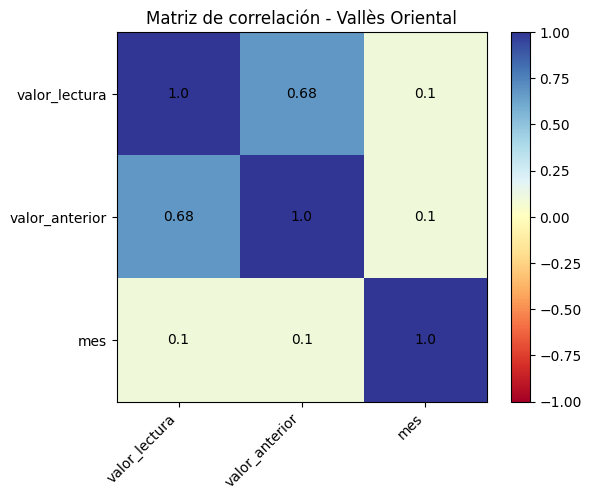

In [24]:
comarca = 0
matriz_correlacion = dicc_comarques[comarques_bcn[comarca]].corr()

fig, ax = plt.subplots()
im = ax.imshow(matriz_correlacion, cmap='RdYlBu', vmin=-1, vmax=1,)
cbar = ax.figure.colorbar(im, ax=ax)

ax.set_xticks(range(len(matriz_correlacion.columns)))
ax.set_yticks(range(len(matriz_correlacion.columns)))
ax.set_xticklabels(matriz_correlacion.columns)
ax.set_yticklabels(matriz_correlacion.columns)

plt.xticks(rotation=45, ha='right')

for i in range(len(matriz_correlacion.columns)):
    for j in range(len(matriz_correlacion.columns)):
        text = ax.text(j, i, round(matriz_correlacion.iloc[i, j], 2),
                       ha="center", va="center", color="black")

ax.set_title(f"Matriz de correlación - {comarques_bcn[comarca]}")

plt.show()

In [25]:
comarca = 0
x = dicc_comarques[comarques_bcn[comarca]].drop(["valor_lectura"], axis=1)
y = dicc_comarques[comarques_bcn[comarca]].valor_lectura

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=47)

In [26]:
for i in range(10):
    poly_features = PolynomialFeatures(degree=i+1)
    x_train_poly = poly_features.fit_transform(x_train)
    x_test_poly = poly_features.transform(x_test)

    model = LinearRegression()
    model.fit(x_train_poly, y_train)

    y_pred = model.predict(x_test_poly)

    print(f'Fit&Predict with degree: {i+1}')
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Error cuadrático medio (MSE): {mse}")
    print(f"R2 Score: {r2}\n")

Fit&Predict with degree: 1
Error cuadrático medio (MSE): 78.12587133682965
R2 Score: 0.45022615298571367

Fit&Predict with degree: 2
Error cuadrático medio (MSE): 77.01336026790246
R2 Score: 0.45805492314525686

Fit&Predict with degree: 3
Error cuadrático medio (MSE): 76.87826523380308
R2 Score: 0.4590055905149574

Fit&Predict with degree: 4
Error cuadrático medio (MSE): 76.76939347771739
R2 Score: 0.45977172397561816

Fit&Predict with degree: 5
Error cuadrático medio (MSE): 76.6996661706079
R2 Score: 0.460262396901444

Fit&Predict with degree: 6
Error cuadrático medio (MSE): 77.5547441531912
R2 Score: 0.45424519025865007

Fit&Predict with degree: 7
Error cuadrático medio (MSE): 77.86152752890352
R2 Score: 0.45208634743514753

Fit&Predict with degree: 8
Error cuadrático medio (MSE): 77.8115006985831
R2 Score: 0.45243838757868227

Fit&Predict with degree: 9
Error cuadrático medio (MSE): 78.281408132085
R2 Score: 0.44913163639579756

Fit&Predict with degree: 10
Error cuadrático medio (MS